In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Imports, loading data, looking at data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data['Survived'] = "test"
df = test_data.append(train_data, sort=False).reset_index(drop=True) # объединяем

In [6]:
drop_column = ['PassengerId','Cabin', 'Ticket']
df = df.drop(drop_column, axis=1)

print(test_data.isnull().sum())
print("-"*10)
print(train_data.isnull().sum())
print("-"*10)
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64
----------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Survived      0
dtype: int64


In [7]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,test
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,test
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,test
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,test
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,test
...,...,...,...,...,...,...,...,...,...
1304,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
1305,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
1306,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
1307,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [8]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
 8   Survived  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB
None


,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


# Data Cleaning

## Missing Values

### Age

In [9]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
cols_with_missing

['Age', 'Fare', 'Embarked']

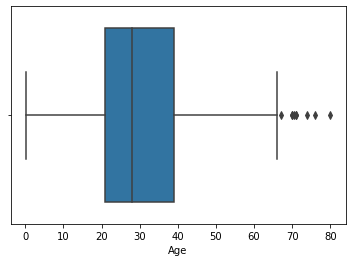

In [10]:
#Plot Age Outliers
sns.boxplot(x=df['Age'])

In [11]:
df.Age = df['Age'].fillna(df.Age.median())

In [12]:
df.Age

0       34.5
1       47.0
2       62.0
3       27.0
4       22.0
        ... 
1304    27.0
1305    19.0
1306    28.0
1307    26.0
1308    32.0
Name: Age, Length: 1309, dtype: float64

### Gender

In [13]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

,Sex,Survived
0,female,0.742038
1,male,0.188908


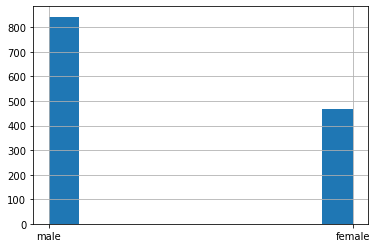

In [14]:
df.Sex.hist()
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### Embarked

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

### Fare

In [16]:
    #complete missing fare with median
df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [17]:
df.isnull().any()

Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Survived    False
dtype: bool

# Feature Engineering

In [18]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,test
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,test
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,test
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,test
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,test
...,...,...,...,...,...,...,...,...,...
1304,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
1305,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
1306,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,0
1307,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = 1 #initialize to yes/1 is alone
df['IsAlone'].loc[df['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
df['FareBin'] = pd.qcut(df['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

In [21]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (df['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df['Title'].value_counts())
print("-"*10)

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64
----------


In [22]:
#preview data again
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      1309 non-null   int64   
 1   Name        1309 non-null   object  
 2   Sex         1309 non-null   object  
 3   Age         1309 non-null   float64 
 4   SibSp       1309 non-null   int64   
 5   Parch       1309 non-null   int64   
 6   Fare        1309 non-null   float64 
 7   Embarked    1309 non-null   object  
 8   Survived    1309 non-null   object  
 9   FamilySize  1309 non-null   int64   
 10  IsAlone     1309 non-null   int64   
 11  Title       1309 non-null   object  
 12  FareBin     1309 non-null   category
 13  AgeBin      1309 non-null   category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 125.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone,Title,FareBin,AgeBin
1089,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,0,2,0,Mr,"(31.275, 512.329]","(16.0, 32.0]"
392,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,20.2500,S,test,3,0,Master,"(14.454, 31.275]","(-0.08, 16.0]"
1078,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,133.6500,S,1,3,0,Misc,"(31.275, 512.329]","(48.0, 64.0]"
163,3,"Pearce, Mr. Ernest",male,28.0,0,0,7.0000,S,test,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
896,3,"Karlsson, Mr. Nils August",male,22.0,0,0,7.5208,S,0,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
732,2,"Hart, Mr. Benjamin",male,43.0,1,1,26.2500,S,0,3,0,Mr,"(14.454, 31.275]","(32.0, 48.0]"
286,3,"Franklin, Mr. Charles (Charles Fardon)",male,28.0,0,0,7.2500,S,test,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
182,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,53.1000,S,test,2,0,Mrs,"(31.275, 512.329]","(16.0, 32.0]"
985,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,0,5,0,Mrs,"(14.454, 31.275]","(16.0, 32.0]"
1106,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,7.7958,S,0,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"


# Imputation and Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
  
df['Sex_Code'] = label.fit_transform(df['Sex'])
df['Embarked_Code'] = label.fit_transform(df['Embarked'])
df['Title_Code'] = label.fit_transform(df['Title'])
df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])
df['FareBin_Code'] = label.fit_transform(df['FareBin'])


In [24]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,test,1,1,Mr,"(-0.001, 7.896]","(32.0, 48.0]",1,1,3,2,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,test,2,0,Mrs,"(-0.001, 7.896]","(32.0, 48.0]",0,2,4,2,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,test,1,1,Mr,"(7.896, 14.454]","(48.0, 64.0]",1,1,3,3,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,test,1,1,Mr,"(7.896, 14.454]","(16.0, 32.0]",1,2,3,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,test,3,0,Mrs,"(7.896, 14.454]","(16.0, 32.0]",0,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,1,1,Misc,"(7.896, 14.454]","(16.0, 32.0]",1,2,1,1,1
1305,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,1,Miss,"(14.454, 31.275]","(16.0, 32.0]",0,2,2,1,2
1306,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,0,4,0,Miss,"(14.454, 31.275]","(16.0, 32.0]",0,2,2,1,2
1307,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,1,Mr,"(14.454, 31.275]","(16.0, 32.0]",1,0,3,1,2


In [25]:
target = ['Survived']
features = ['Pclass', 'Embarked_Code','Sex_Code', 'Title_Code','SibSp', 'Parch', 'FamilySize', 'IsAlone','AgeBin_Code','FareBin_Code']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         1309 non-null   int64   
 1   Name           1309 non-null   object  
 2   Sex            1309 non-null   object  
 3   Age            1309 non-null   float64 
 4   SibSp          1309 non-null   int64   
 5   Parch          1309 non-null   int64   
 6   Fare           1309 non-null   float64 
 7   Embarked       1309 non-null   object  
 8   Survived       1309 non-null   object  
 9   FamilySize     1309 non-null   int64   
 10  IsAlone        1309 non-null   int64   
 11  Title          1309 non-null   object  
 12  FareBin        1309 non-null   category
 13  AgeBin         1309 non-null   category
 14  Sex_Code       1309 non-null   int64   
 15  Embarked_Code  1309 non-null   int64   
 16  Title_Code     1309 non-null   int64   
 17  AgeBin_Code    1309 non-null   in

In [27]:
df_test = df[df['Survived'] == 'test']
df_train = df[df['Survived'] != 'test']

In [28]:
X = df_train[features]
y = df_train['Survived']
test_X = df_test[features]

In [29]:
test_X

,Pclass,Embarked_Code,Sex_Code,Title_Code,SibSp,Parch,FamilySize,IsAlone,AgeBin_Code,FareBin_Code
0,3,1,1,3,0,0,1,1,2,0
1,3,2,0,4,1,0,2,0,2,0
2,2,1,1,3,0,0,1,1,3,1
3,3,2,1,3,0,0,1,1,1,1
4,3,2,0,4,1,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,3,2,1,3,0,0,1,1,1,1
414,1,0,0,1,0,0,1,1,2,3
415,3,2,1,3,0,0,1,1,2,0
416,3,2,1,3,0,0,1,1,1,1


In [30]:
y

418     0
419     1
420     1
421     1
422     0
       ..
1304    0
1305    1
1306    0
1307    1
1308    0
Name: Survived, Length: 891, dtype: object

In [31]:
X

,Pclass,Embarked_Code,Sex_Code,Title_Code,SibSp,Parch,FamilySize,IsAlone,AgeBin_Code,FareBin_Code
418,3,2,1,3,1,0,2,0,1,0
419,1,0,0,4,1,0,2,0,2,3
420,3,2,0,2,0,0,1,1,1,1
421,1,2,0,4,1,0,2,0,2,3
422,3,2,1,3,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
1304,2,2,1,1,0,0,1,1,1,1
1305,1,2,0,2,0,0,1,1,1,2
1306,3,2,0,2,1,2,4,0,1,2
1307,1,0,1,3,0,0,1,1,1,2


In [32]:
'''from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_X = pd.get_dummies(X)
new_X = scale.fit_transform(new_X)
new_test = pd.get_dummies(test_X)
new_test = scale.fit_transform(new_test)'''

'from sklearn.preprocessing import MinMaxScaler\nscale = MinMaxScaler()\nnew_X = pd.get_dummies(X)\nnew_X = scale.fit_transform(new_X)\nnew_test = pd.get_dummies(test_X)\nnew_test = scale.fit_transform(new_test)'

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Modeling

In [34]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
y_train = label.fit_transform(y_train.astype('int'))

In [36]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [37]:
xgbc_model = XGBClassifier()

In [38]:
from sklearn.model_selection import StratifiedKFold
parameterss = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

kfolds = StratifiedKFold(5)
cls = GridSearchCV(xgbc_model, parameterss, n_jobs=5, 
                   cv=kfolds.split(X_train,y_train), 
                   scoring='roc_auc',
                   verbose=2, refit=True)


cls.fit(X_train, y_train)
output4 = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Survived': cls.predict(test_X)})


output4.to_csv('submission4.csv', index=False)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s finished


In [39]:
'''model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_valid, y_train, y_valid, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)'''

"model = XGBRegressor()\nparam_grid = {\n    'n_estimators': [400, 700, 1000],\n    'colsample_bytree': [0.7, 0.8],\n    'max_depth': [15,20,25],\n    'reg_alpha': [1.1, 1.2, 1.3],\n    'reg_lambda': [1.1, 1.2, 1.3],\n    'subsample': [0.7, 0.8, 0.9]\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_valid, y_train, y_valid, model, \n                                 param_grid, cv=5)\n\n# Root Mean Squared Error\nprint(np.sqrt(-model.best_score_))\nprint(model.best_params_)"

In [40]:
'''best_params = {'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.1, 'subsample': 0.9}'''

"best_params = {'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.1, 'subsample': 0.9}"

In [41]:
best_params = {'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.1, 'subsample': 0.9}

In [42]:
'''other_model = n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1'''

"other_model = n_estimators= 2000,\n max_depth= 4,\n min_child_weight= 2,\n #gamma=1,\n gamma=0.9,                        \n subsample=0.8,\n colsample_bytree=0.8,\n objective= 'binary:logistic',\n nthread= -1,\n scale_pos_weight=1"

In [43]:
my_model = XGBRegressor(**model.best_params_, objective= 'binary:logistic' )
'''my_model = XGBRegressor(parameters = best_params, objective= 'binary:logistic')'''

NameError: name 'model' is not defined

# CRoss-Validation

In [44]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

NameError: name 'my_model' is not defined

In [45]:
my_model.fit(X,y)

NameError: name 'my_model' is not defined

In [46]:
print(train_data.shape, )

(891, 12)


In [47]:
preds_test = my_model.predict(test_X)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Survived': preds_test})



NameError: name 'my_model' is not defined

In [48]:
def roundss(col):
    if col >= 0.5:
        return 1
    else:
        return 0

In [49]:
output.Survived = output.Survived.apply(roundss)

NameError: name 'output' is not defined

In [50]:
output.Survived.value_counts()

NameError: name 'output' is not defined

In [51]:
'''output.to_csv('submission2.csv', index=False)
'''output

SyntaxError: invalid syntax (<ipython-input-51-0b795784ce59>, line 2)

In [52]:
output.hist()

NameError: name 'output' is not defined

In [53]:
'''from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
forest.fit(X,y)

output3 = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Survived': forest.predict(test_X)})
output3.Survived = output3.Survived.apply(roundss)
output3
output3.to_csv('submission3.csv', index=False)'''

"from sklearn.ensemble import RandomForestRegressor\nforest = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)\nforest.fit(X,y)\n\noutput3 = pd.DataFrame({'PassengerId': test_data['PassengerId'],\n                       'Survived': forest.predict(test_X)})\noutput3.Survived = output3.Survived.apply(roundss)\noutput3\noutput3.to_csv('submission3.csv', index=False)"